#### Load race and Gender Prediction Model

In [17]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

## Loading Trained ML Model to Predict Race and Gender
import pickle

# Load Gender ML Model
gender_path = "C:/Users/momin/OneDrive - University of Oklahoma/02_TRICS_Lab/Research Data/Social Media/CBBM Momin/Gender/random_forest_final_trained_model_Oct_14_2022"
with open (gender_path,'rb') as gender_file:
    gender_model = pickle.load(gender_file)

# Load Race ML Model

race_path = "C:/Users/momin/OneDrive - University of Oklahoma/02_TRICS_Lab/Research Data/Social Media/CBBM Momin/Race/race_prediction_model_rf.pkl"

with open (race_path,'rb') as race_file:
    race_model = pickle.load(race_file)

# function to convert name into matrix
def count_letter(name):
    letter_matrix ={}
    for i in 'abcdefghijklmnopqrstuvwxyz':
        letter_matrix[i]=0
    for i in name:
        if i in letter_matrix:
            letter_matrix[i] += 1
        else:
            letter_matrix[i] = 1
    return letter_matrix

# Function to predict gender
def predict_gender(name):
    gender = gender_model.predict([list(count_letter(name.lower()).values())])
    return gender[0]

# Function to predict Race
def predict_race(name):
    race = race_model.predict([list(count_letter(name.lower()).values())])
    return race[0]

##### Read True Gender Data

In [18]:
df=pd.read_csv('Gender_Validation_Data.csv')
df

,True Gender,Full Name,Author,First Name
0,male,pc5408 (Andy #BoomerSooner 🎸🏎 🏈),pc5408,Andy
1,male,tyler_brungardt (Tyler Brungardt),tyler_brungardt,Tyler
2,male,kbweingart (Bret Weingart),kbweingart,Bret
3,male,AustinCooper90 (Austin Cooper),AustinCooper90,Austin
4,male,kris_kinder (Kris Kinder),kris_kinder,Kris
...,...,...,...,...
2573,male,JSegura220 (Jose Segura),JSegura220,Jose
2574,male,SteveDodge2 (Steve Dodge),SteveDodge2,Steve
2575,male,JMartinez1789 (Jose Martinez),JMartinez1789,Jose
2576,male,singram1974 (Shawn Ingram),singram1974,Shawn


In [20]:
from tqdm import tqdm
# Enable tqdm for pandas apply
tqdm.pandas()

df['Predicted Gender']=df['True Gender'].progress_apply(lambda x: predict_gender(x))
df

100%|██████████| 2578/2578 [00:14<00:00, 177.69it/s]


,True Gender,Full Name,Author,First Name,Predicted Gender
0,male,pc5408 (Andy #BoomerSooner 🎸🏎 🏈),pc5408,Andy,M
1,male,tyler_brungardt (Tyler Brungardt),tyler_brungardt,Tyler,M
2,male,kbweingart (Bret Weingart),kbweingart,Bret,M
3,male,AustinCooper90 (Austin Cooper),AustinCooper90,Austin,M
4,male,kris_kinder (Kris Kinder),kris_kinder,Kris,M
...,...,...,...,...,...
2573,male,JSegura220 (Jose Segura),JSegura220,Jose,M
2574,male,SteveDodge2 (Steve Dodge),SteveDodge2,Steve,M
2575,male,JMartinez1789 (Jose Martinez),JMartinez1789,Jose,M
2576,male,singram1974 (Shawn Ingram),singram1974,Shawn,M


In [21]:
# Apply the function with a progress bar
df['Predicted Gender']=df['Predicted Gender'].progress_apply(lambda x: 'male' if x=='M' else 'female')
df

100%|██████████| 2578/2578 [00:00<00:00, 860695.35it/s]


,True Gender,Full Name,Author,First Name,Predicted Gender
0,male,pc5408 (Andy #BoomerSooner 🎸🏎 🏈),pc5408,Andy,male
1,male,tyler_brungardt (Tyler Brungardt),tyler_brungardt,Tyler,male
2,male,kbweingart (Bret Weingart),kbweingart,Bret,male
3,male,AustinCooper90 (Austin Cooper),AustinCooper90,Austin,male
4,male,kris_kinder (Kris Kinder),kris_kinder,Kris,male
...,...,...,...,...,...
2573,male,JSegura220 (Jose Segura),JSegura220,Jose,male
2574,male,SteveDodge2 (Steve Dodge),SteveDodge2,Steve,male
2575,male,JMartinez1789 (Jose Martinez),JMartinez1789,Jose,male
2576,male,singram1974 (Shawn Ingram),singram1974,Shawn,male


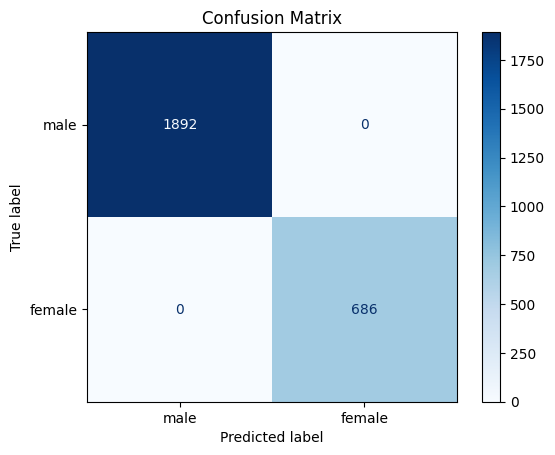

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(df['True Gender'], df['Predicted Gender'], labels=["male", "female"])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["male", "female"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

# Save the figure with a specified DPI
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")  # Save as PNG with 300 DPI
plt.show()

#### Download Census Surnames

In [24]:
import requests

# URL for the 2010 Census Surnames dataset
url = "https://www2.census.gov/topics/genealogy/2010surnames/names.zip"

# Path to save the ZIP file
zip_path = "census_surnames.zip"

# Download the ZIP file
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(zip_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print(f"Downloaded file saved to {zip_path}")
else:
    print(f"Failed to download data. HTTP Status Code: {response.status_code}")

# Extract the ZIP file
import zipfile

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("census_surnames")
    print("Extracted files saved to the 'census_surnames' folder.")

Downloaded file saved to census_surnames.zip
Extracted files saved to the 'census_surnames' folder.


##### Read Census Data

In [48]:
import pandas as pd
df=pd.read_csv("census_surnames/Names_2010Census.csv")
df

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
0,SMITH,1,2442977,828.19,828.19,70.9,23.11,0.5,0.89,2.19,2.4
1,JOHNSON,2,1932812,655.24,1483.42,58.97,34.63,0.54,0.94,2.56,2.36
2,WILLIAMS,3,1625252,550.97,2034.39,45.75,47.68,0.46,0.82,2.81,2.49
3,BROWN,4,1437026,487.16,2521.56,57.95,35.6,0.51,0.87,2.55,2.52
4,JONES,5,1425470,483.24,3004.80,55.19,38.48,0.44,1,2.61,2.29
...,...,...,...,...,...,...,...,...,...,...,...
162249,DIETZMANN,160975,100,0.03,90062.93,96,0,0,(S),0,(S)
162250,DOKAS,160975,100,0.03,90062.96,94,(S),0,0,(S),(S)
162251,DONLEA,160975,100,0.03,90062.99,94,0,0,0,0,6
162252,DORIOTT,160975,100,0.03,90063.03,89,0,(S),0,5,(S)


#### Character-Level Neural Network

In [33]:
df.isna().sum()

name            0
rank            0
count           0
prop100k        0
cum_prop100k    0
pctwhite        0
pctblack        0
pctapi          0
pctaian         0
pct2prace       0
pcthispanic     0
dtype: int64

In [40]:
df=df.dropna()
df = df[:-1]  # Slicing to remove the last row
df

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
0,SMITH,1,2442977,828.19,828.19,70.9,23.11,0.5,0.89,2.19,2.4
1,JOHNSON,2,1932812,655.24,1483.42,58.97,34.63,0.54,0.94,2.56,2.36
2,WILLIAMS,3,1625252,550.97,2034.39,45.75,47.68,0.46,0.82,2.81,2.49
3,BROWN,4,1437026,487.16,2521.56,57.95,35.6,0.51,0.87,2.55,2.52
4,JONES,5,1425470,483.24,3004.80,55.19,38.48,0.44,1,2.61,2.29
...,...,...,...,...,...,...,...,...,...,...,...
162248,DOBBEN,160975,100,0.03,90062.89,98,0,(S),0,0,(S)
162249,DIETZMANN,160975,100,0.03,90062.93,96,0,0,(S),0,(S)
162250,DOKAS,160975,100,0.03,90062.96,94,(S),0,0,(S),(S)
162251,DONLEA,160975,100,0.03,90062.99,94,0,0,0,0,6


In [52]:
import pandas as pd

# List of race percentage columns
# race_columns = ['white', 'black', 'api', 'aian', '2prace', 'hispanic']
race_columns = ['pctwhite', 'pctblack', 'pctapi', 'pctaian', 'pct2prace', 'pcthispanic']


# Add a new column for the predominant race
df['Predominant_Race'] = df[race_columns].idxmax(axis=1)

# Simplify race labels by removing 'pct' prefix
df['Predominant_Race'] = df['Predominant_Race'].str.replace('pct', '', regex=False)

# Display the DataFrame with the new column
df[['name', 'Predominant_Race']]

,name,Predominant_Race
0,SMITH,white
1,JOHNSON,white
2,WILLIAMS,black
3,BROWN,white
4,JONES,white
...,...,...
162248,DOBBEN,white
162249,DIETZMANN,white
162250,DOKAS,white
162251,DONLEA,white


In [53]:
df['Predominant_Race'].value_counts()

Predominant_Race
white       130676
hispanic     12527
black         8419
api           8076
2prace        1775
aian           779
Name: count, dtype: int64

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert surnames into character-level n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
X = vectorizer.fit_transform(df['name'])

#### Split Data

In [55]:
from sklearn.model_selection import train_test_split

# Features: Character-level n-grams
X = df['name']  # Raw surnames (or transformed features)

# Target: Predominant Race
y = df['Predominant_Race']  # Use the dominant race as the label

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#### Encode the Target Variable
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Transform the test labels using the same encoder

# Check the mapping of labels
dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

{'2prace': 0, 'aian': 1, 'api': 2, 'black': 3, 'hispanic': 4, 'white': 5}

#### Train a Model

In [57]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Use TfidfVectorizer with XGBoost
pipeline = make_pipeline(
    TfidfVectorizer(analyzer='char', ngram_range=(1, 3)),  # Character-level features
    xgb.XGBClassifier(objective='multi:softmax', num_class=6)  # Multi-class classification
)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_pred = pipeline.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.33      0.00      0.01       324\n           1       0.33      0.01      0.01       168\n           2       0.68      0.19      0.30      1579\n           3       0.76      0.02      0.03      1611\n           4       0.81      0.29      0.42      2522\n           5       0.84      0.99      0.91     26247\n\n    accuracy                           0.84     32451\n   macro avg       0.63      0.25      0.28     32451\nweighted avg       0.82      0.84      0.79     32451\n'

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.00      0.01       324
           1       0.33      0.01      0.01       168
           2       0.68      0.19      0.30      1579
           3       0.76      0.02      0.03      1611
           4       0.81      0.29      0.42      2522
           5       0.84      0.99      0.91     26247

    accuracy                           0.84     32451
   macro avg       0.63      0.25      0.28     32451
weighted avg       0.82      0.84      0.79     32451



#### Preprocessing Steps

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
# Replace with your actual file path
df=pd.read_csv("census_surnames/Names_2010Census.csv")
df=df.dropna()
df = df[:-1]  # Slicing to remove the last row


# Define features and target
X = df['name']  # Surname as input feature
race_columns = ['pctwhite', 'pctblack', 'pctapi', 'pctaian', 'pct2prace', 'pcthispanic']
df['Predominant_Race'] = df[race_columns].idxmax(axis=1)
# Simplify race labels by removing 'pct' prefix
df['Predominant_Race'] = df['Predominant_Race'].str.replace('pct', '', regex=False)

y = df['Predominant_Race']  # Predominant race as target

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert surnames into character-level n-grams
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))  # Character-level n-grams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


{'2prace': 0, 'aian': 1, 'api': 2, 'black': 3, 'hispanic': 4, 'white': 5}


#### XGBoost Model

In [62]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), use_label_encoder=False)

# Train the model
xgb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

      2prace       0.33      0.00      0.01       324
        aian       0.33      0.01      0.01       168
         api       0.68      0.19      0.30      1579
       black       0.76      0.02      0.03      1611
    hispanic       0.81      0.29      0.42      2522
       white       0.84      0.99      0.91     26247

    accuracy                           0.84     32451
   macro avg       0.63      0.25      0.28     32451
weighted avg       0.82      0.84      0.79     32451

XGBoost Accuracy: 0.8358756278697113


#### Neural Network Model

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the Neural Network
nn_model = Sequential([
    Input(shape=(X_train_tfidf.shape[1],)),  # Input layer (TF-IDF feature size)
    Dense(128, activation='relu'),          # Hidden layer with 128 neurons
    Dropout(0.3),                           # Dropout for regularization
    Dense(64, activation='relu'),           # Hidden layer with 64 neurons
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Make predictions
y_pred_nn = nn_model.predict(X_test_tfidf).argmax(axis=1)

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn, target_names=label_encoder.classes_))

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\momin\anaconda3\python.exe"
  * The NumPy version is: "1.23.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\momin\anaconda3\python.exe"
  * The NumPy version is: "1.23.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\momin\anaconda3\python.exe"
  * The NumPy version is: "1.23.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


ImportError: _multiarray_umath failed to import

ImportError: numpy._core.umath failed to import